In [2]:
##for reading data through read.csv
import pandas as pd

#for plotiing of barplot,boxplot
import matplotlib.pyplot as plt


#for graphical representation
import seaborn as sns
import numpy as np


In [3]:
#Load the data through read_csv function
cars=pd.read_csv("C:\\Users\\faiza\\Downloads\\Cars1.csv")

In [4]:
# to display the plot in the same page we use the inline keyword
%matplotlib inline

In [5]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [6]:
cars.shape

(81, 5)

In [7]:
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [9]:
type(cars)

pandas.core.frame.DataFrame

In [10]:
# for building the linear regression model
import statsmodels.formula.api as smf

In [11]:
#ols is a function, fit is a function used to fit the reg  model on the dataset. 
#ols is a method which is being implemented on the dataset
ml1=smf.ols("MPG ~ WT+ VOL+ SP+ HP", data=cars).fit()

In [12]:
# to view the coefficient
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [13]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           1.54e-23
Time:                        10:50:46   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
m1_v= smf.ols("MPG ~ VOL", data = cars).fit()

In [15]:
m2_w=smf.ols("MPG ~ WT", data = cars).fit()

In [16]:
m3_vw= smf.ols("MPG ~ WT+VOL", data = cars).fit()

In [17]:
m3_vw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           2.43e-06
Time:                        10:50:46   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# After combining Vol and Wt, the p values are not significant.
# So u need to find the influential records and delete those records

In [19]:
# Checking for  influential records through index plot

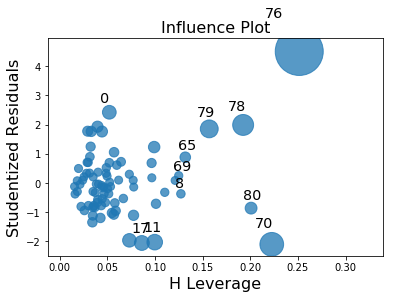

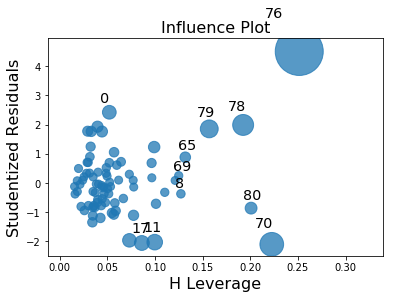

In [20]:
#stats models.api is used for influence plot
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [21]:
# to remove the influential records we need to use the 
# drop function along with the index of the variable which we want to remove

In [22]:
car_new=cars.drop(cars.index[[66,68]],axis = 0,inplace = False)

In [23]:
car_new.tail(20)

,HP,MPG,VOL,SP,WT
59,100,28.860225,115,115.576579,37.662874
60,145,27.354265,111,130.208698,36.888153
61,120,24.609132,116,117.668550,37.860411
62,140,23.515917,131,126.048103,43.390988
63,140,23.515917,123,125.312342,40.722831
64,150,23.605158,121,128.128401,40.159482
65,165,40.050000,50,126.598513,15.712859
67,165,23.103172,127,133.680223,41.573975
69,245,21.273708,112,158.300669,37.141733
70,280,19.678507,50,164.598513,15.823060


In [24]:
m1_new= smf.ols("MPG ~ VOL+HP+SP+WT", data = car_new).fit()

In [25]:
m1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     59.53
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           2.17e-22
Time:                        10:50:53   Log-Likelihood:                -228.88
No. Observations:                  79   AIC:                             467.8
Df Residuals:                      74   BIC:                             479.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1267     15.068      2.066      0.042       1.103      61.150
VOL           -0.4012      0.583     -0.688      0.494      -1.564       0.761
HP            -0.2032      0.040     -5.119      0.000      -0.282      -0.124
SP             0.3898      0.160      2.436      0.017       0.071       0.709
WT             0.6006      1.738      0.346      0.731      -2.863       4.064
==============================================================================
Omnibus:                        9.670   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.953
Skew:                           0.682   Prob(JB):                      0.00690
Kurtosis:                       4.080   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print(m1_new.conf_int(0.05))

                  0          1
Intercept  1.103433  61.149975
VOL       -1.563680   0.761319
HP        -0.282352  -0.124122
SP         0.071030   0.708646
WT        -2.862865   4.064159


In [27]:
mpg_pred = m1_new.predict(car_new)

In [28]:
car_new['pv'] = car_new['pv'] =mpg_pred

In [29]:
car_new['pv']

0     43.354256
1     42.452655
2     42.288536
3     42.622074
4     42.122307
5     43.093176
6     42.357540
7     47.982674
8     48.290040
9     40.811732
10    41.566583
11    47.676529
12    40.022564
13    41.575650
14    41.810083
15    41.711450
16    41.092833
17    47.941166
18    41.329253
19    37.830861
20    38.559367
21    37.338287
22    37.819772
23    39.648938
24    39.864721
25    46.680986
26    35.430092
27    38.865949
28    38.361995
29    36.117726
        ...    
49    33.445439
50    33.298571
51    33.432369
52    29.211217
53    27.707222
54    28.433247
55    28.616351
56    35.877330
57    33.010599
58    35.394349
59    32.345428
60    30.043291
61    28.813678
62    25.319812
63    26.639810
64    26.169230
65    36.324307
67    23.727507
69    20.422002
70    27.832046
71    22.489839
72    23.189384
73    18.936241
74    24.027240
75    21.297965
76    21.431397
77    18.099310
78    26.187090
79    12.581678
80    15.743397
Name: pv, Length: 79, dt

In [30]:
car_new.head()

,HP,MPG,VOL,SP,WT,pv
0,49,53.700681,89,104.185353,28.762059,43.354256
1,55,50.013401,92,105.461264,30.466833,42.452655
2,55,50.013401,92,105.461264,30.193597,42.288536
3,70,45.696322,92,113.461264,30.632114,42.622074
4,53,50.504232,92,104.461264,29.889149,42.122307


In [31]:
cars['P'] = cars['p'] = mpg_pred

In [32]:
cars.head()

,HP,MPG,VOL,SP,WT,P,p
0,49,53.700681,89,104.185353,28.762059,43.354256,43.354256
1,55,50.013401,92,105.461264,30.466833,42.452655,42.452655
2,55,50.013401,92,105.461264,30.193597,42.288536,42.288536
3,70,45.696322,92,113.461264,30.632114,42.622074,42.622074
4,53,50.504232,92,104.461264,29.889149,42.122307,42.122307


In [33]:
rsq_hp = smf.ols("HP ~ WT+VOL+SP", data = cars).fit()
rsq_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     485.8
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           6.46e-50
Time:                        10:50:55   Log-Likelihood:                -320.90
No. Observations:                  81   AIC:                             649.8
Df Residuals:                      77   BIC:                             659.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -359.1891     14.118    -25.443      0.000    -387.301    -331.077
WT            -5.8704      4.875     -1.204      0.232     -15.579       3.838
VOL            1.9137      1.638      1.168      0.246      -1.348       5.175
SP             3.9323      0.103     38.045      0.000       3.726       4.138
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.483
Skew:                           0.564   Prob(JB):                       0.0391
Kurtosis:                       3.805   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
rsq_hp = smf.ols("HP ~ WT+SP+VOL", data = cars).fit().rsquared

In [35]:
vif_hp = 1/(1-rsq_hp)

In [36]:
vif_hp

19.926588974998563

In [37]:
rsq_sp = smf.ols("SP ~ WT+HP+VOL", data = cars).fit().rsquared

In [38]:
vif_sp = 1/(1-rsq_sp)
vif_sp

20.00763878305008

In [39]:
rsq_vol = smf.ols("VOL ~ WT+SP+HP", data = cars).fit().rsquared

In [40]:
vif_vol = 1/(1-rsq_vol)

In [41]:
vif_vol

638.8060836592878

In [42]:
rsq_wt = smf.ols("WT ~ HP+SP+VOL", data = cars).fit().rsquared

In [43]:
vif_wt = 1/(1-rsq_wt)
vif_wt

639.5338175572624

In [44]:
d1 = {'var':['hp','wt','sp','vol'], 'vif':[vif_hp,vif_wt,vif_sp,vif_vol]}

In [45]:
type(d1)

dict

In [46]:
vif_frame = pd.DataFrame(d1)

In [47]:
vif_frame

,var,vif
0,hp,19.926589
1,wt,639.533818
2,sp,20.007639
3,vol,638.806084


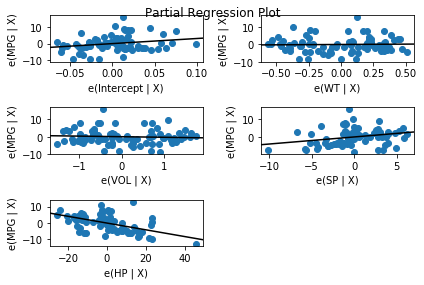

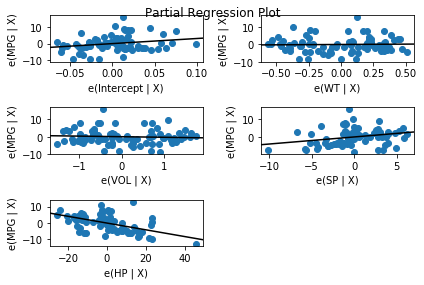

In [48]:
sm.graphics.plot_partregress_grid(ml1)

In [49]:
final_m1 = smf.ols('MPG ~ VOL+SP+HP', data=cars).fit()
final_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           1.56e-24
Time:                        10:51:05   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
final_m1.params

Intercept    29.923389
VOL          -0.201651
SP            0.400659
HP           -0.206705
dtype: float64

In [51]:
log_m1 = smf.ols("MPG ~ np.log(VOL) + np.log(SP) + np.log(WT)+ np.log(HP)", data=cars).fit()

In [52]:
log_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           3.05e-39
Time:                        10:51:05   Log-Likelihood:                -195.25
No. Observations:                  81   AIC:                             400.5
Df Residuals:                      76   BIC:                             412.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -151.3204     60.552     -2.499      0.015    -271.920     -30.721
np.log(VOL)    13.5270     32.950      0.411      0.683     -52.099      79.153
np.log(SP)     79.7634     10.293      7.750      0.000      59.264     100.263
np.log(WT)    -23.9481     31.801     -0.753      0.454     -87.286      39.389
np.log(HP)    -37.6318      2.711    -13.879      0.000     -43.032     -32.231
==============================================================================
Omnibus:                       23.169   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.490
Skew:                           0.407   Prob(JB):                     2.84e-34
Kurtosis:                       9.717   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
exp_m1 = smf.ols("np.log(MPG) ~ HP + WT + VOL +SP", data=cars).fit()

In [54]:
exp_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(MPG)   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     74.77
Date:                Tue, 27 Aug 2019   Prob (F-statistic):           1.41e-25
Time:                        10:51:06   Log-Likelihood:                 49.273
No. Observations:                  81   AIC:                            -88.55
Df Residuals:                      76   BIC:                            -76.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9089      0.451      6.444      0.000       2.010       3.808
HP            -0.0079      0.001     -6.632      0.000      -0.010      -0.006
WT            -0.0044      0.051     -0.086      0.932      -0.107       0.098
VOL           -0.0051      0.017     -0.294      0.770      -0.039       0.029
SP             0.0178      0.005      3.705      0.000       0.008       0.027
==============================================================================
Omnibus:                       15.640   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.275
Skew:                           0.525   Prob(JB):                     1.80e-09
Kurtosis:                       6.291   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
X = cars.iloc[:,[0,2,3,4]]
X.head()

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149


In [56]:
y = cars.iloc[:,1]
y.head()

0    53.700681
1    50.013401
2    50.013401
3    45.696322
4    50.504232
Name: MPG, dtype: float64

In [57]:
print(X.shape)
print(y.shape)

(81, 4)
(81,)


In [58]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64, 4)
(17, 4)
(64,)
(17,)


In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
pred = reg.predict(X_test)
pred

array([37.3617628 , 38.7074597 , 29.06366575, 41.49794875, 22.51118612,
       24.55153852, 34.58741927, 28.54309907, 27.75729402, 34.91819258,
       33.52564075, 37.74914445, 36.78240263, 34.87940581, 19.32579436,
       42.16439053, 33.07251139])

In [62]:
pred == y_test

22    False
27    False
61    False
13    False
71    False
74    False
30    False
55    False
53    False
26    False
50    False
42    False
48    False
33    False
73    False
2     False
57    False
Name: MPG, dtype: bool

In [63]:
np.mean(pred)

32.764638615780484

In [64]:
np.mean(y_test)

32.246424178823524

In [72]:
np.mean((y_test-pred)**2)

14.437169667685794

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)


14.437169667685794

In [76]:
np.sqrt(((pred - y_test) ** 2).mean())

3.799627569602815